In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('movies.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movies.shape

(9742, 3)

In [5]:
movies[movies['title']=='Matrix, The (1999)']

,movieId,title,genres
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [6]:
ratings = pd.read_csv('ratings.csv')

In [7]:
ratings.shape

(100836, 4)

In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings['userId'].nunique()

610

In [10]:
# Find the movieID with the maximum number of ratings
max_rated_movie_id = ratings['movieId'].value_counts().idxmax()

# Get the details of the movie with the maximum number of ratings
max_rated_movie_details = movies[movies['movieId'] == max_rated_movie_id]

max_rating=movies[movies['movieId']==356]['title']

In [11]:
max_rating

314    Forrest Gump (1994)
Name: title, dtype: object

In [12]:
movies[movies['title']=='Forrest Gump (1994)']

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [13]:
tags=pd.read_csv('tags.csv')

In [14]:
# Select tags for "Matrix, The (1999)"
matrix_tags = tags[(tags['movieId'] == 2571)]

# Print the result
print("Tags for 'Matrix, The (1999)':")
print(matrix_tags[['userId', 'movieId', 'tag', 'timestamp']])

Tags for 'Matrix, The (1999)':
      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


In [15]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]

# Calculate the average user rating for the movie
average_rating = ratings[ratings['movieId'] == terminator_2_movie_id]['rating'].mean()

# Print the result
print(f"Average user rating for 'Terminator 2: Judgment Day (1991)': {average_rating:.2f}")

Average user rating for 'Terminator 2: Judgment Day (1991)': 3.97


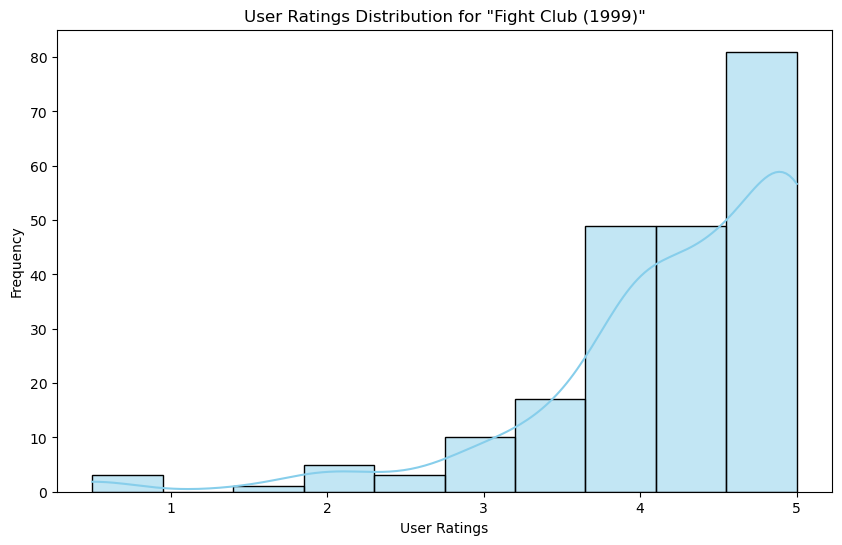

In [16]:
# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].iloc[0]

# Filter ratings for "Fight Club (1999)"
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('User Ratings')
plt.ylabel('Frequency')
plt.show()

In [17]:
# Step 1: Group user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

# Rename columns for clarity
grouped_ratings.columns = ['movieId', 'num_ratings', 'avg_rating']

# Step 2: Apply inner join on movies.csv and the grouped df
merged_data = pd.merge(movies, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter only those movies with more than 50 user ratings
filtered_data = merged_data[merged_data['num_ratings'] > 50]

# Display the resulting DataFrame
print(filtered_data.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  num_ratings  avg_rating  
0  Adventure|Animation|Children|Comedy|Fantasy          215    3.920930  
1                   Adventure|Children|Fantasy          110    3.431818  
2                               Comedy|Romance           52    3.259615  
5                        Action|Crime|Thriller          102    3.946078  
6                               Comedy|Romance           54    3.185185  


In [18]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_data.loc[filtered_data['avg_rating'].idxmax()]

# Display the result
print("Most popular movie based on average user ratings:")
print(most_popular_movie[['movieId', 'title', 'avg_rating']])

Most popular movie based on average user ratings:
movieId                                    318
title         Shawshank Redemption, The (1994)
avg_rating                            4.429022
Name: 277, dtype: object


In [19]:
# Select top 5 popular movies based on number of user ratings
top_5_popular_movies = filtered_data.nlargest(5, 'num_ratings')

# Display the result
print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['movieId', 'title', 'num_ratings']])

Top 5 popular movies based on number of user ratings:
      movieId                             title  num_ratings
314       356               Forrest Gump (1994)          329
277       318  Shawshank Redemption, The (1994)          317
257       296               Pulp Fiction (1994)          307
510       593  Silence of the Lambs, The (1991)          279
1938     2571                Matrix, The (1999)          278


In [20]:
# Filter Sci-Fi movies from the filtered data
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]

# Select the third most popular Sci-Fi movie based on number of user ratings
third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'num_ratings').iloc[-1]

# Display the result
print("Third most popular Sci-Fi movie based on number of user ratings:")
print(third_most_popular_sci_fi_movie[['movieId', 'title', 'num_ratings']])

Third most popular Sci-Fi movie based on number of user ratings:
movieId                         480
title          Jurassic Park (1993)
num_ratings                     238
Name: 418, dtype: object


In [21]:
filtered_data.head()

,movieId,title,genres,num_ratings,avg_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [22]:
links=pd.read_csv('links.csv')

In [23]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [26]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

In [27]:
# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies1 = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings1 = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]
 
 
 
 
# create a empty list for storing
# movie information
list = []
 
# Iterating over movies to extract
# each movie's details
for index in range(0, len(movies1)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies1[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)
 
# printing movie details with its rating.
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
        ') -', 'Starring:', movie['star_cast'], movie['rating'])
 
 
##.......##
df = pd.DataFrame(list)
df.to_csv('imdb_top_250_movies.csv',index=False)

In [28]:
movies[movies['title']=='Shawshank Redemption, The (1994)']

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [29]:
movies[movies['genres']=='Sci-Fi']

,movieId,title,genres
1719,2311,2010: The Year We Make Contact (1984),Sci-Fi
1902,2526,Meteor (1979),Sci-Fi
2000,2661,It Came from Outer Space (1953),Sci-Fi
2003,2665,Earth vs. the Flying Saucers (1956),Sci-Fi
2026,2698,Zone 39 (1997),Sci-Fi
2507,3354,Mission to Mars (2000),Sci-Fi
3121,4198,Battle Beyond the Stars (1980),Sci-Fi
3522,4813,When Worlds Collide (1951),Sci-Fi
3600,4942,"Angry Red Planet, The (1959)",Sci-Fi
3893,5468,20 Million Miles to Earth (1957),Sci-Fi


In [30]:
movies[movies['title']=='Doctor Who: A Christmas Carol (2010)']

,movieId,title,genres
9147,147376,Doctor Who: A Christmas Carol (2010),Sci-Fi
